<a href="https://colab.research.google.com/github/manbr21/pdi/blob/main/recorte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math as mth
from google.colab.patches import cv2_imshow

**O objetivo desse notebook é recortar as cores da imagem para preto e branco (apenas)**

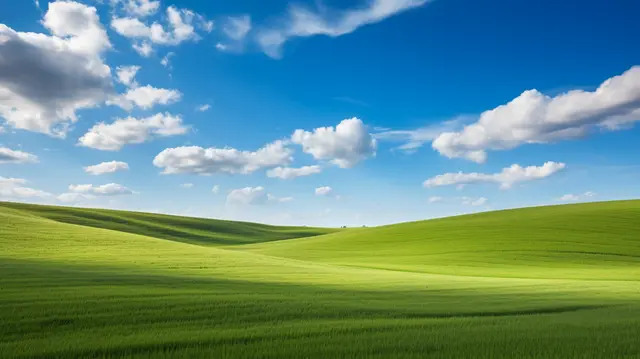

In [4]:
foto = cv.imread('/content/windows.png')
cv2_imshow(foto)

A primeira tentativa de recorte gerou essa imagem:

(359, 640, 3)


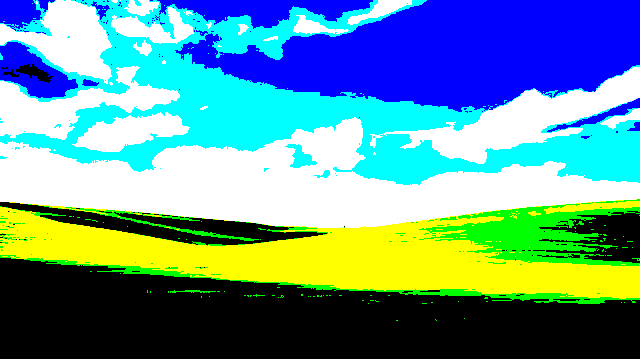

In [16]:
size = foto.shape
print(size)
th = 127 #ponto de recorte

primeira_tentativa = foto.copy()

for i in range(size[0]):
  for j in range(size[1]):
    for k in range(size[2]):
      if primeira_tentativa[i,j,k] > th: #como as matrizes de cores possuem o mesmo valor, a comparação é direta
        primeira_tentativa[i,j,k] = 255
      else:
        primeira_tentativa[i,j,k] = 0

cv2_imshow(primeira_tentativa)



*Isso ocorreu pois os valor correspondente do pixel na matriz R,G e B podem ser diferentes, ocorrendo a mudança parcial para o valor 255 enquanto as outras possuiam valor 0*

Recortando para preto e branco usando a média de cores RGB do pixel

(359, 640, 3)


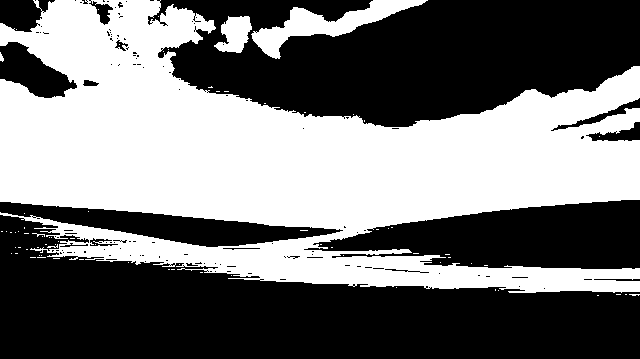

In [17]:
foto_recorte = foto.copy()

for i in range(size[0]):
  for j in range(size[1]):
    if foto[i,j,0] / 3 + foto[i,j,1] / 3 + foto[i,j,2] / 3 > th: #se a média for maior que o threshold vira branco
      foto_recorte[i,j,0] = 255
      foto_recorte[i,j,1] = 255
      foto_recorte[i,j,2] = 255
    else: #vira preto
      foto_recorte[i,j,0] = 0
      foto_recorte[i,j,1] = 0
      foto_recorte[i,j,2] = 0

print(size)
cv2_imshow(foto_recorte)

Transformando a imagem para tons de cinza para unificar o valor das matrizes RGB e tratar como uma análise direta de um valor para recorte

(359, 640, 3)


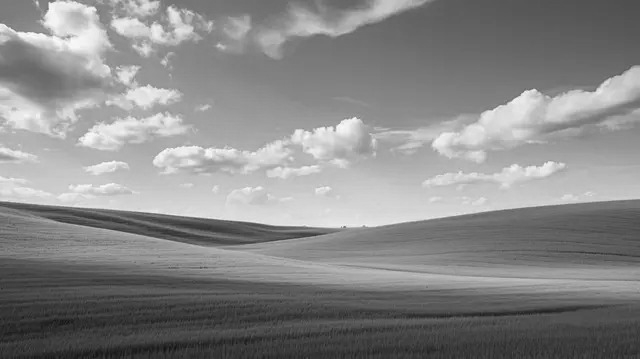

In [19]:
foto_cinza = foto.copy()
for i in range(size[0]): #altura
  for j in range(size[1]): #largura
    c = mth.ceil(((59 * foto[i,j,1]) + (29 * foto[i,j,0]) + (11 * foto[i,j,2])) / 100) #c = 0,59 * G + 0,29 * R + 0,11 * B (teto)
    for k in range(size[2]): #canais (RGB)
      foto_cinza[i,j,k] = c #cada valor da matriz RGB naquele pixel vira c

print(size)
cv2_imshow(foto_cinza)

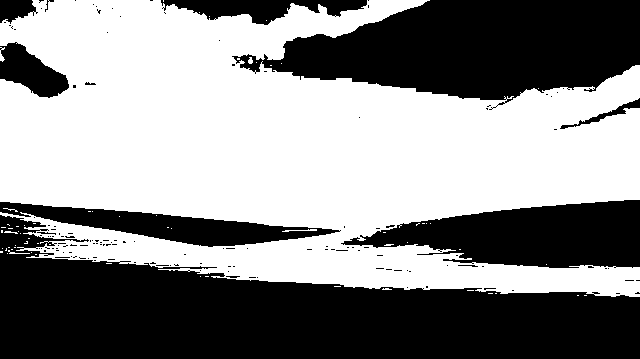

In [20]:
foto_cinza_recorte = foto_cinza.copy()

for i in range(size[0]):
  for j in range(size[1]):
    for k in range(size[2]):
      if foto_cinza_recorte[i,j,k] > th: #como as matrizes de cores possuem o mesmo valor, a comparação é direta
        foto_cinza_recorte[i,j,k] = 255
      else:
        foto_cinza_recorte[i,j,k] = 0

cv2_imshow(foto_cinza_recorte)